In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

## Sklearn

In [40]:
data = pd.read_csv('VIRAC.csv')
data=data.dropna()   #<==== have to drop the nans
x = data.iloc[:, 0].values.reshape(-1, 1)
y = data.iloc[:, 1].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

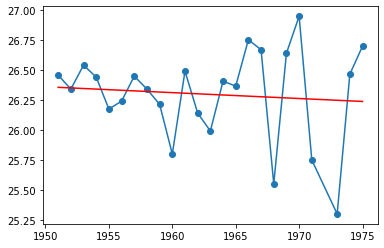

In [41]:
plt.plot(x, y,'-o')
plt.plot(x, y_pred, 'r')

In [42]:
slope=linear_regressor.coef_
slope

array([[-0.00490916]])

no uncertainties!

## Statsmodels OLS

In [43]:
data = pd.read_csv('VIRAC.csv')
x = array(data['Year'])
y = array(data['Temperature'])
model=ols("y ~ x",data={'y':y,'x':x})
result=model.fit()
y_pred = result.predict({'x':x})

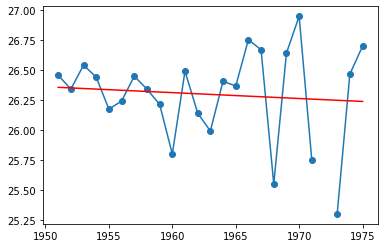

In [44]:
plt.plot(x, y,'-o')
plt.plot(x, y_pred, 'r')

In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.1849
Date:                Wed, 06 May 2020   Prob (F-statistic):              0.671
Time:                        11:49:10   Log-Likelihood:                -10.900
No. Observations:                  24   AIC:                             25.80
Df Residuals:                      22   BIC:                             28.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.9344     22.405      1.604      0.123     -10.530      82.399
x             -0.0049      0.011     -0.430      0.671      -0.029       0.019
==============================================================================
Omnibus:                        2.809   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                1.727
Skew:                          -0.653   Prob(JB):                        0.422
Kurtosis:                       3.152   Cond. No.                     5.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
slope=result.params['x']
slope_uncertainty=result.bse['x']
print("Slope = %.3g +- %.3g" % (slope,slope_uncertainty))

Slope = -0.00491 +- 0.0114


In [47]:
x,y

(array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
        1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
        1973, 1974, 1975]),
 array([26.45833333, 26.34166667, 26.54166667, 26.44166667, 26.175     ,
        26.24166667, 26.45      , 26.34166667, 26.21428571, 25.8       ,
        26.49166667, 26.14166667, 25.99166667, 26.40833333, 26.36666667,
        26.75454545, 26.67      , 25.55      , 26.64166667, 26.95      ,
        25.75      ,         nan, 25.3       , 26.46666667, 26.7       ]))